# Digital Signal Processing

### MsCV - ViBOT - MAIA

In [1]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
import scipy as sp
from skimage import io

from skimage import img_as_float
from matplotlib import cm
from skimage import img_as_ubyte
from scipy import signal



Pretty printing has been turned OFF


## Filtering 
**1.1**

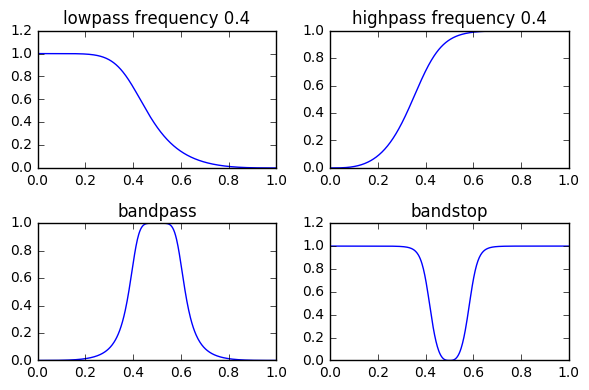

In [2]:
#butterworth filter
filter_ord=3
w_cutoff=0.4
w_pass=0.4
bandpass=0.6


buttb_num, butta_den= signal.butter(filter_ord,w_cutoff,btype='low')
buttw1, butth1 = signal.freqz(buttb_num, butta_den)
plt.plot(buttw1/np.pi, abs(butth1))

#highpass
butth_num, butth_den= signal.butter(filter_ord,w_pass,btype='highpass')
buttw2, butth2 = signal.freqz(butth_num, butth_den)

#bandpass
buttpass_num, buttpass_den= signal.butter(filter_ord,[w_pass,bandpass],btype='bandpass')
buttw3, butth3 = signal.freqz(buttpass_num, buttpass_den)

#bandpass
buttstop_num, buttstop_den= signal.butter(filter_ord,[w_pass,bandpass],btype='bandstop')
buttw4, butth4 = signal.freqz(buttstop_num, buttstop_den)






#plt.figure()
plt.subplot(2,2,1)
plt.plot(buttw1/np.pi, abs(butth1))
plt.title('lowpass frequency 0.4')
plt.subplot(2,2,2)
plt.plot(buttw2/np.pi, abs(butth2))
plt.title('highpass frequency 0.4')
plt.subplot(2,2,3)
plt.plot(buttw3/np.pi, abs(butth3))
plt.title('bandpass')
plt.subplot(2,2,4)
plt.plot(buttw4/np.pi, abs(butth4))
plt.title('bandstop')
plt.tight_layout()






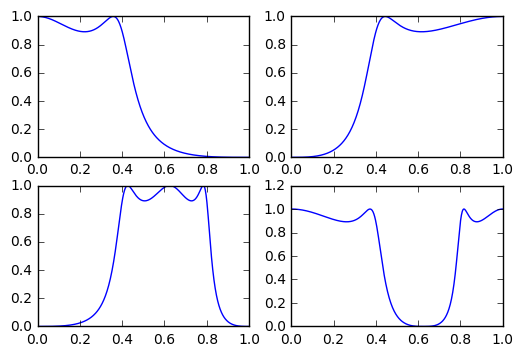

In [3]:
#chebychev
order=3
wcutoff=0.4
wcut=0.8
ripple=1.0
N=[3,5,10,20]

for i in range (0,len(N)):
    [b, a] = signal.cheby1(N[i],ripple,wcutoff,btype='lowpass')
    [W,H] = signal.freqz(b, a)
    plt.plot(W/np.pi,np.abs(H))
    

cheb_1, cheba_1 = signal.cheby1(order,ripple,wcutoff,btype='lowpass')
chebw1, chebh1 = signal.freqz(cheb_1, cheba_1)

#highpass

cheb_2, cheba_2 = signal.cheby1(order,ripple,wcutoff,btype='highpass')
chebw2, chebh2 = signal.freqz(cheb_2, cheba_2)

#bandpass
cheb_3, cheba_3 = signal.cheby1(order,ripple,[wcutoff,wcut],btype='bandpass')
chebw3, chebh3 = signal.freqz(cheb_3, cheba_3)

#bandstop
cheb_4, cheba_4 = signal.cheby1(order,ripple,[wcutoff,wcut],btype='bandstop')
chebw4, chebh4 = signal.freqz(cheb_4, cheba_4)






plt.subplot(2,2,1)
plt.plot(chebw1/np.pi, abs(chebh1))
plt.subplot(2,2,2)
plt.plot(chebw2/np.pi, abs(chebh2))
plt.subplot(2,2,3)
plt.plot(chebw3/np.pi, abs(chebh3))
plt.subplot(2,2,4)
plt.plot(chebw4/np.pi, abs(chebh4))
#higpass






**1.2**

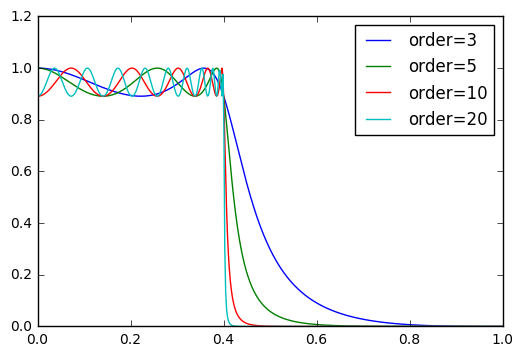

In [4]:
#chebychev
order=3
wcutoff=0.4
wcut=0.8
ripple=1.0
N=[3,5,10,20]

for i in range (0,len(N)):
    [b, a] = signal.cheby1(N[i],ripple,wcutoff,btype='lowpass')
    [W,H] = signal.freqz(b, a)
    plt.plot(W/np.pi,np.abs(H))
    
plt.legend(['order=3','order=5','order=10','order=20'])
#more it's the order of the filter more the ripples ....when i increase the order i will go with the pole 
# of the filter in the direction of the instability so in the direction of the unit circle

## Recursive filter 

**2.1**

In [5]:
def dirac(n=0, N=20):
    if n>N-1:
        raise ValueError('nn')
        return
        
    s=np.zeros((N,))
    s[n]=1
    return s

<Container object of 3 artists>

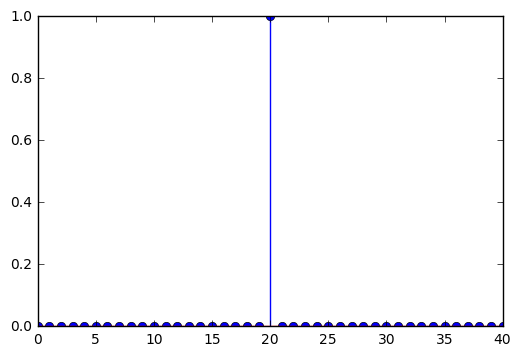

In [6]:
xdirac=dirac(20,41)
plt.stem(xdirac)


# **2.2**

<Container object of 3 artists>

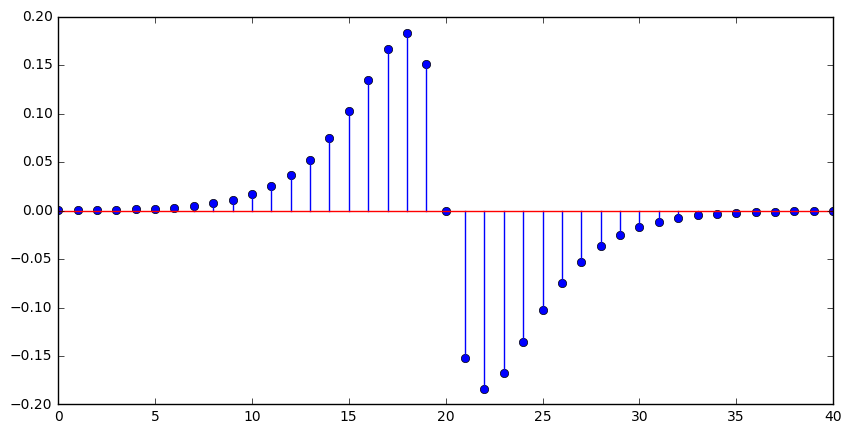

In [7]:
def derivativeR(x,scaling=0.5,Ts=1):
    #normalize
    scaling=scaling/Ts
    #padding
    x=np.pad(x,[2,2],'constant')
    #derivative
    alpha=scaling*Ts
    a=np.exp(-alpha)
    
    #causal
    ycaus=np.zeros(x.shape)
    for i in range (2,x.size):
        ycaus[i]=-scaling*a*alpha*x[i-1]+2*a*ycaus[i-1]-a*a*ycaus[i-2]
        
    #anticausal
    yantcaus=np.zeros(x.shape)
    for i in range (x.size-3,-1,-1):
        yantcaus[i]=scaling*a*alpha*x[i+1]+2*a*yantcaus[i+1]-a*a*yantcaus[i+2]

        

    y=ycaus+yantcaus
    return y[2:-2]



plt.figure(figsize=(10,5))
plt.stem(derivativeR(xdirac))








**2.3**

<Container object of 3 artists>

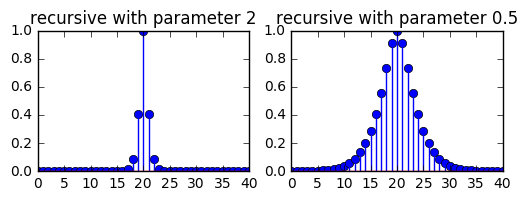

In [8]:
from __future__ import division #I need to import this for the division
def smoothingR(x, scaling=0.5,  Ts=1.0):
    
    scaling = scaling/Ts
    
    
    
    #padding with 1 0 on front and 2 on the back
    x=np.pad(x,[2,2],'constant')
    
    
    #smoothing filter parameter
    alpha=scaling*Ts
    a=np.exp(-alpha)
    
    
    ycausal=np.zeros(x.shape)
    for k in range(2,x.size):
        ycausal[k]=x[k]+a*(alpha-1)*x[k-1]+2*a*ycausal[k-1]-a*a*ycausal[k-2]
        
        
    yanticausal=np.zeros(x.shape)
    for k in range(x.size-3,-1,-1):
        yanticausal[k]=a*(alpha+1)*x[k+1]-a*a*x[k+2]+2*a*yanticausal[k+1]-a*a*yanticausal[k+2]
        
    y=ycausal+yanticausal
    return y[2:-2]

plt.subplot(2,2,1)
plt.title('recursive with parameter 2')
plt.stem(smoothingR(xdirac,scaling=2,Ts=1/41))
plt.subplot(2,2,2)
plt.title('recursive with parameter 0.5')
plt.stem(smoothingR(xdirac,scaling=0.5,Ts=1/41))
    
        
    
    
    

**2.4**

In [9]:
def step(n=0, N=20):
    if n>N-1:
        raise ValueError('change parameter')
        return
        
        
    step_seq=np.zeros((N,))
    step_seq[n:]=np.ones((N-n,))
        
    return step_seq
        


**3.1**

<Container object of 3 artists>

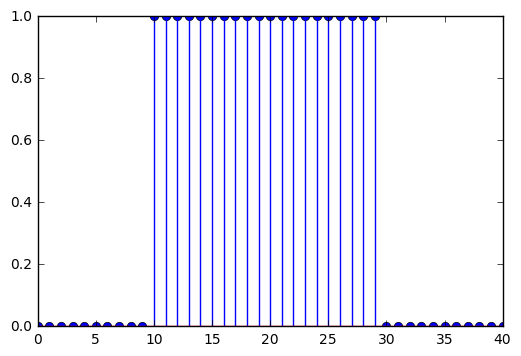

In [10]:
x_box=step(10, 41)-step(30,41)
plt.stem(x_box)


**3.2** , **3.3**

<Container object of 3 artists>

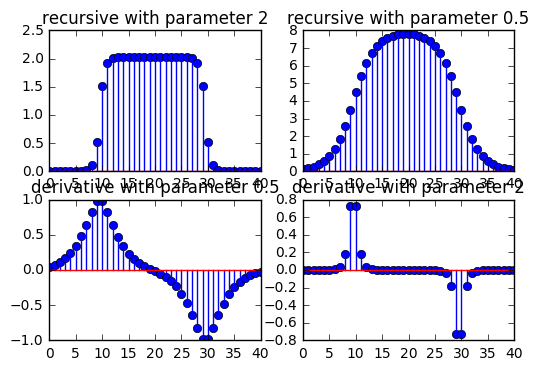

In [11]:
plt.subplot(2,2,1)
plt.title('recursive with parameter 2')
plt.stem(smoothingR(x_box,scaling=2,Ts=1))
plt.subplot(2,2,2)
plt.title('recursive with parameter 0.5')
plt.stem(smoothingR(x_box,scaling=0.5,Ts=1))
plt.subplot(2,2,3)
plt.title('derivative with parameter 0.5')
plt.stem(derivativeR(x_box,scaling=0.5,Ts=1))
plt.subplot(2,2,4)
plt.title('derivative with parameter 2')
plt.stem(derivativeR(x_box,scaling=2,Ts=1))
    

**3.4**

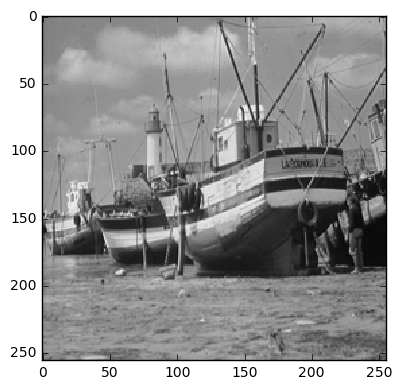

In [12]:
image=img_as_float(io.imread('../images/boat.256.gif',as_grey=True))
io.imshow(image)

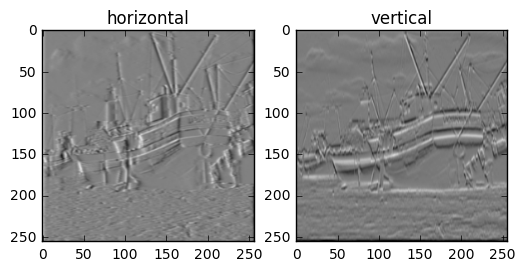

In [20]:


#first we have to apply the smotthing filter in one direction
imagesmo=np.zeros(image.shape)
for r in range(image.shape[0]):
    imagesmo[r,:]= smoothingR(image[r,:],scaling=1.5)
    
    
    
    
#derivative filter to get the gradient
imagegrad=np.zeros(image.shape)
for r in range(image.shape[0]):
    imagegrad[r,:]= derivativeR(imagesmo[r,:],scaling=1.5)
    
    
    
#now we have to do the sam but for the columns

imagesmov=np.zeros(image.shape)
for r in range(image.shape[0]):
    imagesmov[:,r]= smoothingR(image[:,r],scaling=1.5)
    
    
    
    
#derivative filter to get the gradient
imagegradv=np.zeros(image.shape)
for r in range(image.shape[0]):
    imagegradv[:,r]= derivativeR(imagesmov[:,r],scaling=1.5)
    
    
    
    
#print
plt.subplot(1,2,1)
plt.title('horizontal')
plt.imshow(imagegrad,cmap='gray')

#print
plt.subplot(1,2,2)
plt.title('vertical')
plt.imshow(imagegradv,cmap='gray')


    
    


